In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [2]:
df = pd.read_csv('./data/developer_survey_2020/survey_results_public.csv', sep=',', index_col=False)
pd.set_option('display.max_columns', 500)
df.head()

Respondent                                         MainBranch Hobbyist  \
0           1                     I am a developer by profession      Yes   
1           2                     I am a developer by profession       No   
2           3                        I code primarily as a hobby      Yes   
3           4                     I am a developer by profession      Yes   
4           5  I used to be a developer by profession, but no...      Yes   

    Age Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
0   NaN         13  Monthly        NaN            NaN             Germany   
1   NaN         19      NaN        NaN            NaN      United Kingdom   
2   NaN         15      NaN        NaN            NaN  Russian Federation   
3  25.0         18      NaN        NaN            NaN             Albania   
4  31.0         16      NaN        NaN            NaN       United States   

     CurrencyDesc CurrencySymbol DatabaseDesireNextYear  \
0   European Euro            EUR   Microsoft SQL Server   
1  Pound sterling            GBP                    NaN   
2             NaN            NaN                    NaN   
3    Albanian lek            ALL                    NaN   
4             NaN            NaN       MySQL;PostgreSQL   

                          DatabaseWorkedWith  \
0  Elasticsearch;Microsoft SQL Server;Oracle   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4              MySQL;PostgreSQL;Redis;SQLite   

                                             DevType  \
0  Developer, desktop or enterprise applications;...   
1            Developer, full-stack;Developer, mobile   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                           EdLevel  \
0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2                                              NaN   
3  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                          Employment  \
0  Independent contractor, freelancer, or self-em...   
1                                 Employed full-time   
2                                                NaN   
3                                                NaN   
4                                 Employed full-time   

                      Ethnicity Gender  \
0  White or of European descent    Man   
1                           NaN    NaN   
2                           NaN    NaN   
3  White or of European descent    Man   
4  White or of European descent    Man   

                                          JobFactors                 JobSat  \
0  Languages, frameworks, and other technologies ...     Slightly satisfied   
1                                                NaN      Very dissatisfied   
2                                                NaN                    NaN   
3  Flex time or a flexible schedule;Office enviro...  Slightly dissatisfied   
4                                                NaN                    NaN   

                                             JobSeek  \
0       I am not interested in new job opportunities   
1       I am not interested in new job opportunities   
2                                                NaN   
3  I’m not actively looking, but I am open to new...   
4                                                NaN   

     LanguageDesireNextYear        LanguageWorkedWith  \
0    C#;HTML/CSS;JavaScript    C#;HTML/CSS;JavaScript   
1              Python;Swift          JavaScript;Swift   
2  Objective-C;Python;Swift  Objective-C;Python;Swift   
3                       NaN                       NaN   
4           Java;Ruby;Scala         HTML/CSS;Ruby;SQL   

             MiscTechDesir

In [3]:
# check the general shape of data
df.shape

(64461, 61)

In [4]:
# show all of the % of nan
pd.set_option('display.max_rows', 500)
df.isnull().mean().sort_values(ascending = False)

ConvertedComp                   0.460821
CompTotal                       0.459735
NEWPurchaseResearch             0.421030
PurchaseWhat                    0.389336
WebframeDesireNextYear          0.379097
CompFreq                        0.378399
MiscTechWorkedWith              0.374599
NEWJobHuntResearch              0.363615
WorkWeekHrs                     0.361614
NEWDevOpsImpt                   0.352601
WebframeWorkedWith              0.344115
NEWJobHunt                      0.344006
MiscTechDesireNextYear          0.342564
NEWOnboardGood                  0.338778
NEWDevOps                       0.337801
NEWOvertime                     0.329346
Sexuality                       0.317541
DatabaseDesireNextYear          0.316331
OrgSize                         0.312235
JobSat                          0.298894
Age                             0.294985
CurrencySymbol                  0.294581
CurrencyDesc                    0.294581
Ethnicity                       0.287197
YearsCodePro    

In [5]:
df.dtypes

Respondent                        int64
MainBranch                       object
Hobbyist                         object
Age                             float64
Age1stCode                       object
CompFreq                         object
CompTotal                       float64
ConvertedComp                   float64
Country                          object
CurrencyDesc                     object
CurrencySymbol                   object
DatabaseDesireNextYear           object
DatabaseWorkedWith               object
DevType                          object
EdLevel                          object
Employment                       object
Ethnicity                        object
Gender                           object
JobFactors                       object
JobSat                           object
JobSeek                          object
LanguageDesireNextYear           object
LanguageWorkedWith               object
MiscTechDesireNextYear           object
MiscTechWorkedWith               object


In [6]:
# select all object type and replace nan with a string 'no value' as the nan might have meanings
df.loc[:, df.dtypes == np.object] = df.loc[:, df.dtypes == np.object].replace(np.nan, 'no value', regex=True)

<ipython-input-6-3e33c4830113>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.loc[:, df.dtypes == np.object] = df.loc[:, df.dtypes == np.object].replace(np.nan, 'no value', regex=True)


In [7]:
# replace nan with mean in numeric columns
fill_mean = lambda col: col.fillna(col.mean())
df.loc[:, df.dtypes == np.float64] = df.loc[:, df.dtypes == np.float64].apply(fill_mean, axis=0)
df.loc[:, df.dtypes == np.int64] = df.loc[:, df.dtypes == np.int64].apply(fill_mean, axis=0)

# Question 1 - Do people who started coding earlier in life have more chance to make coding a career

<AxesSubplot:>

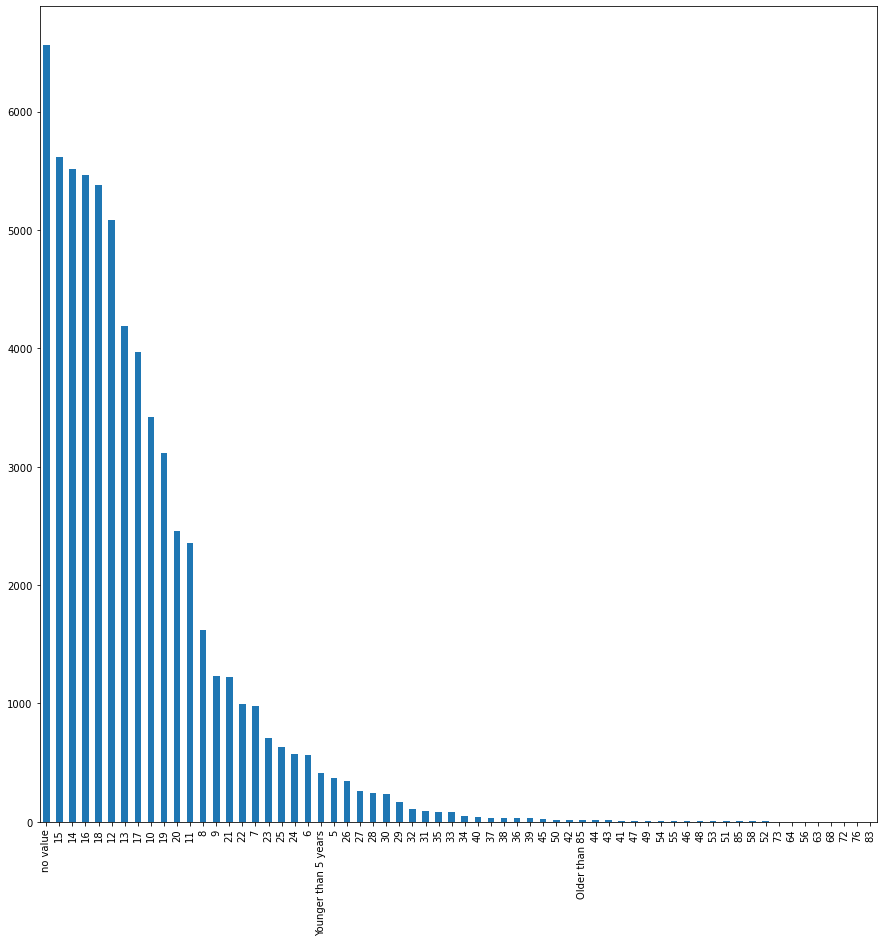

In [8]:
df_Branch_1stCode = df[['MainBranch', 'Age1stCode']]
# get a general view of 'Age1stCode'
mpl.rcParams['figure.figsize'] = [15, 15]
mpl.rcParams['figure.dpi'] = 72
df_Branch_1stCode['Age1stCode'].value_counts().plot(kind='bar')

In [9]:
# replace text with numbers to prepare for the conversion 
df_Branch_1stCode = df_Branch_1stCode[df_Branch_1stCode.Age1stCode != 'no value']
df_Branch_1stCode['Age1stCode'] = df_Branch_1stCode['Age1stCode'].replace('Older than 85', '86', regex=True).replace('Younger than 5 years', '4', regex=True)

In [10]:
# convert object to int
df_Branch_1stCode['Age1stCode'] = df_Branch_1stCode['Age1stCode'].astype(int)

In [11]:
pd.DataFrame(df_Branch_1stCode[['MainBranch', 'Age1stCode']].groupby(['MainBranch']).mean().sort_values('Age1stCode', ascending=True))

Age1stCode
MainBranch                                                    
I code primarily as a hobby                          14.610808
I used to be a developer by profession, but no ...   15.036217
I am a developer by profession                       15.284417
I am not primarily a developer, but I write cod...   15.951376
I am a student who is learning to code               16.053327
no value                                             17.416149

Conculsion from the result: people who started coding earlier in life do not have more chance to make coding a career. 

# Question 2 - Does different genders have different tendency to seek new jobs?

<AxesSubplot:>

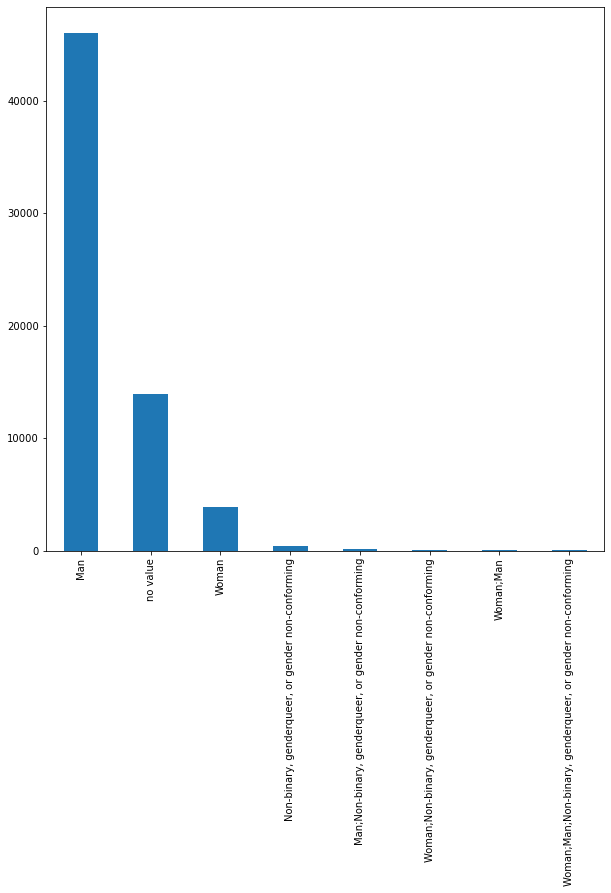

In [12]:
# Get the distrabution of gender
mpl.rcParams['figure.figsize'] = [10, 10]
mpl.rcParams['figure.dpi'] = 72
df['Gender'].value_counts().plot(kind='bar')

In [13]:
# get the pivot table for JobSat and Gender
pivotdf = pd.crosstab(df['JobSeek'], df['Gender'], normalize='columns')[['Man', 'Woman']]

In [15]:
pivotdf

Gender                                                   Man     Woman
JobSeek                                                               
I am actively looking for a job                     0.157238  0.178460
I am not interested in new job opportunities        0.235281  0.272373
I’m not actively looking, but I am open to new ...  0.549736  0.493236
no value                                            0.057745  0.055931

<AxesSubplot:xlabel='JobSeek'>

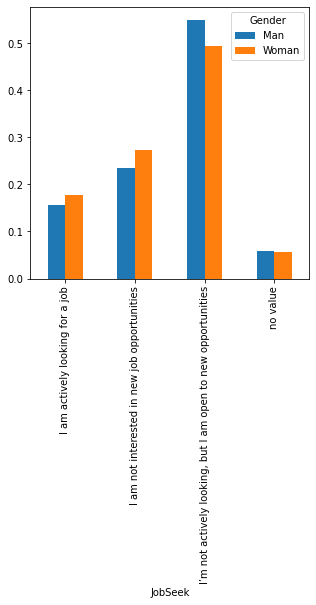

In [14]:
mpl.rcParams['figure.figsize'] = [5, 5]
mpl.rcParams['figure.dpi'] = 72
pivotdf.plot(kind='bar')

The percentage of people looking for a new job and the percentage people who decided not looking for a new job are both higher for women. Comparing to men, women are more certain of their next steps on job seeking.

# Question 3 - Do people tend to seek new jobs when they are not satisfied with their current job?

<AxesSubplot:>

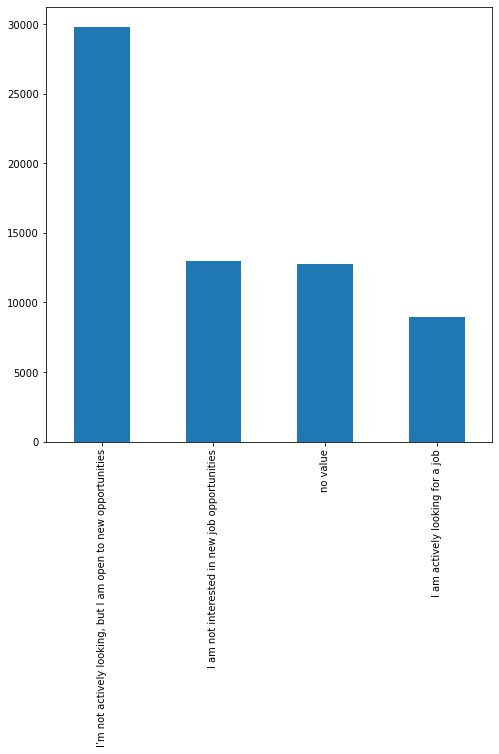

In [18]:
# job seek distribution
mpl.rcParams['figure.figsize'] = [8, 8]
mpl.rcParams['figure.dpi'] = 72
df['JobSeek'].value_counts().plot(kind='bar')

In [19]:
SatSeekPivot = pd.crosstab(df['JobSeek'], df['JobSat'], normalize='columns')

<AxesSubplot:xlabel='JobSeek'>

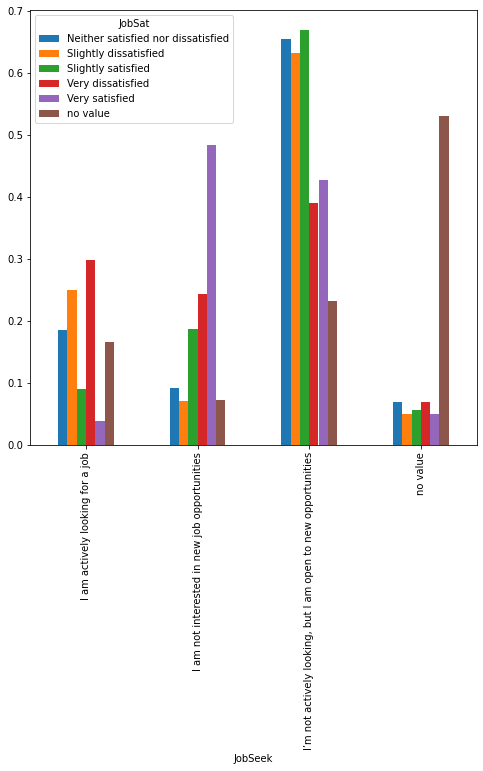

In [20]:
mpl.rcParams['figure.figsize'] = [8, 8]
mpl.rcParams['figure.dpi'] = 72
SatSeekPivot.plot(kind='bar')

people tend to seek new jobs when they are not satisfied with their current job

# Clean data before modeling

In [22]:
# get the detail infomation of every column
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/74 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [84]:
# save original df before convertion
df_o = df

In [85]:
# our target column is JobSeek, 
# I am actively looking for a job - 3
# I’m not actively looking, but I am open to new opportunities - 2
# I am not interested in new job opportunities - 1
# no value - 0
df['JobSeek'].value_counts()

I’m not actively looking, but I am open to new opportunities    29776
I am not interested in new job opportunities                    13001
no value                                                        12734
I am actively looking for a job                                  8950
Name: JobSeek, dtype: int64

In [86]:
df['JobSeek'] = df['JobSeek'].replace('I am actively looking for a job',3).replace('no value',0).replace('I’m not actively looking, but I am open to new opportunities',2).replace('I am not interested in new job opportunities',1)

In [89]:
def convert_category(df):
    '''
    Keep the top 5 values and convert the rest to "others"
    '''
    object_columns = df.select_dtypes(include=['object']).columns
    for column in object_columns:
        top = df[column].isin(df[column].value_counts().index[:5])
        df.loc[~top, column] = "other"
    return df

In [90]:
df = convert_category(df)

In [91]:
def add_dummy(df):
    '''
    Add dummy to object columns
    '''
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in cat_vars:
    # for each cat add dummy var, drop original column
        df = pd.concat(
            [df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, 
                                                  prefix_sep='_', drop_first=True)],axis=1)
    return df

In [92]:
df = add_dummy(df)

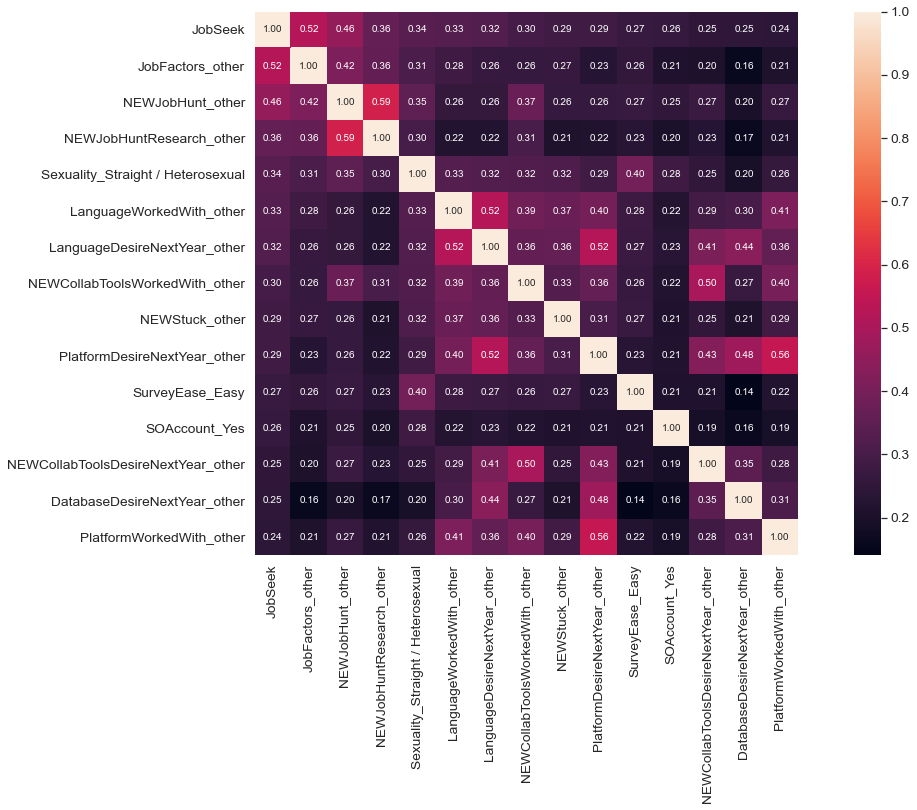

In [94]:
# check the correlation with target column
corrmat = df.corr()
plt.figure(figsize=(20,10))
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'JobSeek')['JobSeek'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [95]:
target = 'JobSeek'
X = df.loc[:, df.columns != target]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)


lm_model = LinearRegression(normalize=True) 


lm_model.fit(X_train, y_train) 

LinearRegression(normalize=True)

In [96]:
#Predict
y_test_preds = lm_model.predict(X_test)

#Score
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.6741876838257854 on 19339 values.'

In [97]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

In [99]:
#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(30)

est_int         coefs  \
32                                  CurrencySymbol_USD  7.755998e+10   
27                   CurrencyDesc_United States dollar -7.755998e+10   
31                                  CurrencySymbol_INR  5.483038e+10   
25                           CurrencyDesc_Indian rupee -5.483038e+10   
33                             CurrencySymbol_no value -3.954318e+10   
28                               CurrencyDesc_no value  3.954318e+10   
29                                  CurrencyDesc_other  6.197496e+09   
34                                CurrencySymbol_other -6.197496e+09   
30                                  CurrencySymbol_GBP  3.562909e+08   
26                         CurrencyDesc_Pound sterling -3.562909e+08   
73                                 JobFactors_no value -7.851885e-01   
7               MainBranch_I code primarily as a hobby -7.422565e-01   
126                                NEWJobHunt_no value -5.009349e-01   
57       Employment_Not employed, but looking for work  4.794509e-01   
8    MainBranch_I used to be a developer by profess... -4.485199e-01   
77                               JobSat_Very satisfied -3.866459e-01   
250                              YearsCodePro_no value  3.255667e-01   
9                                     MainBranch_other -3.040316e-01   
78                                     JobSat_no value  2.992978e-01   
5    MainBranch_I am a student who is learning to code  2.923332e-01   
212                               SOVisitFreq_no value -2.265545e-01   
11                                   Hobbyist_no value  2.223906e-01   
245                                 YearsCode_no value -1.964894e-01   
15                                 Age1stCode_no value -1.907383e-01   
121                                 NEWEdImpt_no value  1.792893e-01   
219                              SurveyLength_no value -1.726203e-01   
148                               NEWOvertime_no value -1.613798e-01   
198                                 SOAccount_no value  1.564821e-01   
216                                SurveyEase_no value -1.531149e-01   
62              Ethnicity_White or of European descent -1.507656e-01   

        abs_coefs  
32   7.755998e+10  
27   7.755998e+10  
31   5.483038e+10  
25   5.483038e+10  
33   3.954318e+10  
28   3.954318e+10  
29   6.197496e+09  
34   6.197496e+09  
30   3.562909e+08  
26   3.562909e+08  
73   7.851885e-01  
7    7.422565e-01  
126  5.009349e-01  
57   4.794509e-01  
8    4.485199e-01  
77   3.866459e-01  
250  3.255667e-01  
9    3.040316e-01  
78   2.992978e-01  
5    2.923332e-01  
212  2.265545e-01  
11   2.223906e-01  
245  1.964894e-01  
15   1.907383e-01  
121  1.792893e-01  
219  1.726203e-01  
148  1.613798e-01  
198  1.564821e-01  
216  1.531149e-01  
62   1.507656e-01